# Generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (Dense, Flatten, Reshape,
                                     Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, Input)
from tensorflow.keras.datasets import mnist

2024-06-28 10:29:53.277640: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-28 10:29:53.605677: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 10:29:54.680844: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
latent_space_size = 10

def get_random_input_vector(latent_space_size, batch_size=1):
    
    #Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)
    
    random_vector = np.random.rand(batch_size, latent_space_size)
    
    return random_vector



In [3]:
def make_generator_model(latent_space_size):
    model = keras.Sequential()

    # Input layer
    model.add(Input(shape=(latent_space_size,)))

    # Foundation for 7x7 image
    model.add(Dense(128))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(256))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(1024))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    # Reshape to 28x28x1 for MNIST images
    model.add(Dense(28 * 28 * 1, activation='sigmoid'))
    model.add(Reshape((28, 28, 1)))

    return model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 784)            │       803,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,502,608 (5.73 MB)

 Trainable params: 1,498,768 (5.72 MB)

 Non-trainable params: 3,840 (15.00 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


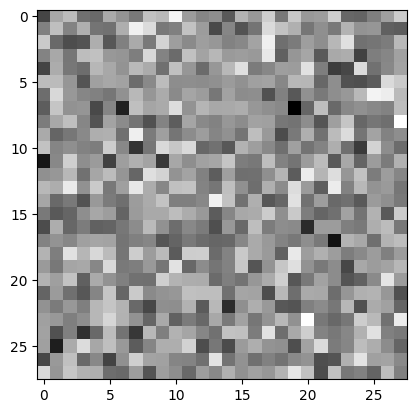

In [4]:
# Create generator model
generator = make_generator_model(latent_space_size)
generator.summary()

# Generate an image using the generator model
random_vector = get_random_input_vector(latent_space_size)
generated_image = generator.predict(random_vector)
plt.imshow(generated_image.reshape(28, 28), cmap='gray')
plt.show()

### Import Mnist dataset

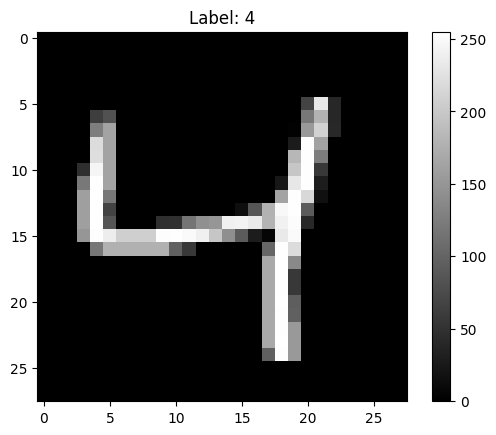

In [5]:
# Charger les données MNIST
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#digits = [0, 1]

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # Utiliser un tout ensemble pour la rapidité
X = X.to_numpy()
y = mnist.target.astype(int)

mask = np.array([l in digits for l in y])
X = X[mask]
y = y[mask]




# Check if X is a DataFrame and convert the first row to a numpy array for visualization
def visualize_image(loc, X, y):
    if isinstance(X, pd.DataFrame):
        image_matrix = X.iloc[loc].values.reshape(28, 28)
        y = y.to_numpy()
    else:
        image_matrix = X[loc].reshape(28, 28)

    # Visualize the image
    plt.imshow(image_matrix, cmap='gray')
    try:
        plt.title(f"Label: {y[loc]}")
    except:
        plt.title('Label: undifined')
    plt.colorbar()
    plt.show()


# Visualize the first image
visualize_image(2, X, y)

In [6]:
type(X)

numpy.ndarray

# Discriminator

In [7]:
def discriminator_model():
    model = keras.Sequential()

    model.add(Input(shape=(28, 28, 1)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(Dense(256))
    model.add(LeakyReLU())
    model.add(Dense(1, activation='sigmoid'))

    return model

In [8]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


In [9]:
ones = tf.ones((1, 1))
zeros = tf.zeros((1, 1))

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)


dis_loss = discriminator_loss(ones, zeros)
gen_loss = generator_loss(zeros)

print('dis_loss', dis_loss)
print('gen_loss', gen_loss)


dis_loss tf.Tensor(1.0064089, shape=(), dtype=float32)
gen_loss tf.Tensor(0.6931472, shape=(), dtype=float32)


In [10]:
generated_image = generator.predict(random_vector)
generated_image.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


(1, 28, 28, 1)

In [11]:
def create_batch_data(size=500, X=None, latent_space_size=latent_space_size):
    batch_real_images = X[:size]
    X = X[size:]
    random_vector = get_random_input_vector(latent_space_size, batch_size=size)
    batch_fake_images = generator.predict(random_vector)
    
    batch_real_images = batch_real_images.reshape(size, 28, 28, 1)

    print('batch_real_images', batch_real_images.shape)
    print('batch_fake_images', batch_fake_images.shape)
    
    batch_data = np.concatenate([batch_real_images, batch_fake_images])
    
    return batch_data, X



In [12]:
batch_data, remaining_data = create_batch_data(500, X, latent_space_size)
batch_data

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
batch_real_images (500, 28, 28, 1)
batch_fake_images (500, 28, 28, 1)


array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [13]:
# Check the shape of the batch data
print(batch_data.shape)

(1000, 28, 28, 1)


In [14]:
batch_data[0].shape

(28, 28, 1)

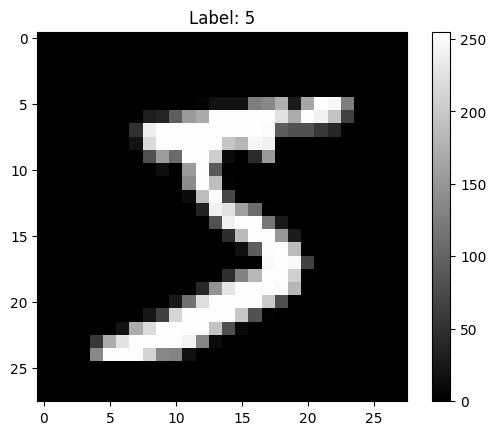

In [15]:
visualize_image(0, batch_data, y)

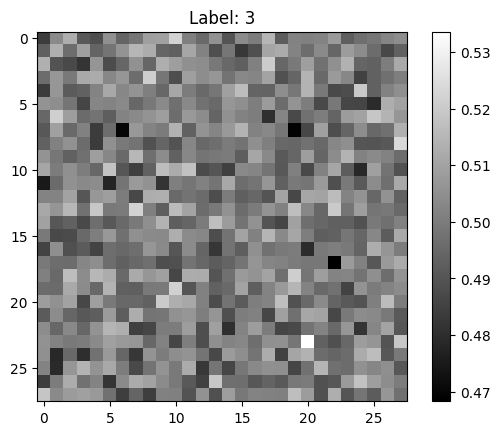

In [16]:
visualize_image(500, batch_data, y)


In [17]:
# Optimizers for the generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Create the discriminator model
discriminator = discriminator_model()
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 533,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Training step function
@tf.function
def train_step(real_images):
    noise = get_random_input_vector(latent_space_size, batch_size=real_images.shape[0])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

In [19]:
# Adjusted train function to include the save directory and save loss values
def train(dataset, epochs, save_dir, model_save_dir, loss_save_file):
    gen_losses = []
    disc_losses = []

    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        gen_losses.append(gen_loss)
        disc_losses.append(disc_loss)

        print(f'Epoch {epoch + 1}, Generator Loss: {gen_loss}, Discriminator Loss: {disc_loss}')

        if (epoch + 1) % 10 == 0:
            generate_and_save_images(generator, epoch + 1, get_random_input_vector(latent_space_size), save_dir)
            generator.save(os.path.join(model_save_dir, 'generator_epoch_{:04d}'.format(epoch + 1) + 
                                        'latent_space_size' + str(latent_space_size) + '.h5'))
            discriminator.save(os.path.join(model_save_dir, 'discriminator_epoch_{:04d}.h5'.format(epoch + 1)+ 
                                            'latent_space_size' + str(latent_space_size) + '.h5'))

    generate_and_save_images(generator, epochs, get_random_input_vector(latent_space_size), save_dir)

    # Save the loss values
    np.savez(loss_save_file, gen_losses=gen_losses, disc_losses=disc_losses)


In [20]:
# Helper function to generate and save images in a specific directory
def generate_and_save_images(model, epoch, test_input, save_dir):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        
    plt.savefig(os.path.join(save_dir, 'image_at_epoch_{:04d}.png'.format(epoch)))
    plt.show()

In [21]:
# Prepare the dataset
def prepare_dataset(X, batch_size):
    X = X / 255.0  # Normalize the images to [0, 1]
    X = X.reshape(-1, 28, 28, 1).astype('float32')
    dataset = tf.data.Dataset.from_tensor_slices(X).shuffle(60000).batch(batch_size, drop_remainder=True)
    return dataset

/home/duincan/miniconda3/envs/Unsupervised/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-06-28 10:30:13.554660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1, Generator Loss: 21.803546905517578, Discriminator Loss: 0.19969618320465088


2024-06-28 10:30:22.012959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2, Generator Loss: 29.25944709777832, Discriminator Loss: 0.22781775891780853


2024-06-28 10:30:30.440997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 3, Generator Loss: 34.59541702270508, Discriminator Loss: 0.4266330599784851


2024-06-28 10:30:38.916344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4, Generator Loss: 31.372821807861328, Discriminator Loss: 0.6460729837417603


2024-06-28 10:30:47.334852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 5, Generator Loss: 29.918476104736328, Discriminator Loss: 0.6850406527519226


2024-06-28 10:30:55.769715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6, Generator Loss: 32.01416015625, Discriminator Loss: 0.3444535732269287


2024-06-28 10:31:04.204310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 7, Generator Loss: 37.80878448486328, Discriminator Loss: 0.5020711421966553


2024-06-28 10:31:10.576547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8, Generator Loss: 47.08175277709961, Discriminator Loss: 0.5219125747680664


2024-06-28 10:31:15.717278: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 9, Generator Loss: 49.538856506347656, Discriminator Loss: 0.48798859119415283
Epoch 10, Generator Loss: 54.90083312988281, Discriminator Loss: 0.4775044620037079


2024-06-28 10:31:20.936535: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


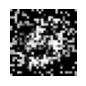

2024-06-28 10:31:26.306612: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 11, Generator Loss: 54.71434783935547, Discriminator Loss: 0.5059918165206909


2024-06-28 10:31:31.508601: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 12, Generator Loss: 54.86622619628906, Discriminator Loss: 0.44865185022354126


2024-06-28 10:31:36.740219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 13, Generator Loss: 21.90449333190918, Discriminator Loss: 0.4031411409378052


2024-06-28 10:31:41.799947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 14, Generator Loss: 2.5940065383911133, Discriminator Loss: 0.4998473525047302


2024-06-28 10:31:47.047348: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 15, Generator Loss: 2.1486592292785645, Discriminator Loss: 0.5590426325798035


2024-06-28 10:31:52.345236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16, Generator Loss: 2.0403785705566406, Discriminator Loss: 0.533214807510376


2024-06-28 10:31:57.604670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 17, Generator Loss: 2.075641632080078, Discriminator Loss: 0.572147011756897


2024-06-28 10:32:02.847084: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 18, Generator Loss: 1.8459205627441406, Discriminator Loss: 0.5489286184310913


2024-06-28 10:32:08.092861: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 19, Generator Loss: 2.1605167388916016, Discriminator Loss: 0.5449483394622803
Epoch 20, Generator Loss: 2.0183563232421875, Discriminator Loss: 0.8168319463729858


2024-06-28 10:32:13.476975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


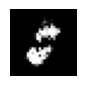

2024-06-28 10:32:18.816098: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 21, Generator Loss: 1.8290563821792603, Discriminator Loss: 0.7057266235351562


2024-06-28 10:32:24.025788: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 22, Generator Loss: 1.7851938009262085, Discriminator Loss: 0.708425760269165


2024-06-28 10:32:29.290061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 23, Generator Loss: 1.7845733165740967, Discriminator Loss: 0.7610412836074829


2024-06-28 10:32:34.473582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 24, Generator Loss: 1.6833922863006592, Discriminator Loss: 0.9227201342582703


2024-06-28 10:32:39.704027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 25, Generator Loss: 2.1450016498565674, Discriminator Loss: 0.6632113456726074


2024-06-28 10:32:44.986997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 26, Generator Loss: 1.8591375350952148, Discriminator Loss: 0.7429855465888977


2024-06-28 10:32:50.308370: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 27, Generator Loss: 1.7747341394424438, Discriminator Loss: 0.6455423831939697


2024-06-28 10:32:55.651473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 28, Generator Loss: 1.495773434638977, Discriminator Loss: 0.8011857867240906


2024-06-28 10:33:00.851984: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 29, Generator Loss: 1.9075884819030762, Discriminator Loss: 0.7541087865829468
Epoch 30, Generator Loss: 1.6950414180755615, Discriminator Loss: 0.8968085646629333


2024-06-28 10:33:06.101150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


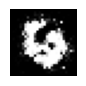

2024-06-28 10:33:11.413475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 31, Generator Loss: 1.5087767839431763, Discriminator Loss: 0.7801445126533508


2024-06-28 10:33:16.861028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 32, Generator Loss: 1.5898617506027222, Discriminator Loss: 0.8784115314483643


2024-06-28 10:33:22.056612: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 33, Generator Loss: 1.2307895421981812, Discriminator Loss: 1.032257080078125


2024-06-28 10:33:27.256429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 34, Generator Loss: 1.1140354871749878, Discriminator Loss: 1.1664788722991943


2024-06-28 10:33:32.588018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 35, Generator Loss: 1.0100014209747314, Discriminator Loss: 1.1784790754318237


2024-06-28 10:33:37.811823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 36, Generator Loss: 1.0607852935791016, Discriminator Loss: 1.143258810043335


2024-06-28 10:33:43.030320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 37, Generator Loss: 0.8542114496231079, Discriminator Loss: 1.32876718044281


2024-06-28 10:33:48.319283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 38, Generator Loss: 0.8630285263061523, Discriminator Loss: 1.3537241220474243


2024-06-28 10:33:53.603113: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 39, Generator Loss: 0.7763447761535645, Discriminator Loss: 1.4184110164642334
Epoch 40, Generator Loss: 0.7950921058654785, Discriminator Loss: 1.3321442604064941


2024-06-28 10:33:59.011285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


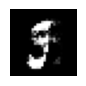

2024-06-28 10:34:04.239360: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 41, Generator Loss: 0.7740675210952759, Discriminator Loss: 1.4367947578430176


2024-06-28 10:34:09.080863: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 42, Generator Loss: 0.6811586022377014, Discriminator Loss: 1.461029052734375


2024-06-28 10:34:13.858034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 43, Generator Loss: 0.7195075750350952, Discriminator Loss: 1.4198369979858398


2024-06-28 10:34:18.927669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 44, Generator Loss: 0.6869152188301086, Discriminator Loss: 1.4316511154174805


2024-06-28 10:34:24.089093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 45, Generator Loss: 0.6991055011749268, Discriminator Loss: 1.420461893081665


2024-06-28 10:34:29.446878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 46, Generator Loss: 0.6714226007461548, Discriminator Loss: 1.448617696762085


2024-06-28 10:34:34.656965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 47, Generator Loss: 0.7106761336326599, Discriminator Loss: 1.4318925142288208


2024-06-28 10:34:39.864935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 48, Generator Loss: 0.718557596206665, Discriminator Loss: 1.3984813690185547


2024-06-28 10:34:45.056543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 49, Generator Loss: 0.7178570032119751, Discriminator Loss: 1.4167894124984741
Epoch 50, Generator Loss: 0.7331199645996094, Discriminator Loss: 1.3480439186096191


2024-06-28 10:34:50.369160: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


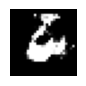

2024-06-28 10:34:55.678615: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 51, Generator Loss: 0.7531380653381348, Discriminator Loss: 1.3393852710723877


2024-06-28 10:35:00.882369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 52, Generator Loss: 0.7634173631668091, Discriminator Loss: 1.3188272714614868


2024-06-28 10:35:06.117426: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 53, Generator Loss: 0.8207094669342041, Discriminator Loss: 1.2598557472229004


2024-06-28 10:35:11.276184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 54, Generator Loss: 0.9368801116943359, Discriminator Loss: 1.167494297027588


2024-06-28 10:35:16.618446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 55, Generator Loss: 0.952843189239502, Discriminator Loss: 1.1489434242248535


2024-06-28 10:35:21.723727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 56, Generator Loss: 1.1196269989013672, Discriminator Loss: 1.118741512298584


2024-06-28 10:35:27.152894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 57, Generator Loss: 0.9052407741546631, Discriminator Loss: 1.130918264389038


2024-06-28 10:35:32.427090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 58, Generator Loss: 0.9317490458488464, Discriminator Loss: 1.1927343606948853


2024-06-28 10:35:37.870013: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 59, Generator Loss: 0.8666222095489502, Discriminator Loss: 1.2232617139816284
Epoch 60, Generator Loss: 0.8629699945449829, Discriminator Loss: 1.2896394729614258


2024-06-28 10:35:43.179784: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


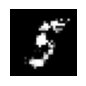

2024-06-28 10:35:48.520400: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 61, Generator Loss: 0.8379663825035095, Discriminator Loss: 1.3703104257583618


2024-06-28 10:35:53.658862: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 62, Generator Loss: 0.7562963962554932, Discriminator Loss: 1.3903477191925049


2024-06-28 10:35:59.487000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 63, Generator Loss: 0.7529210448265076, Discriminator Loss: 1.366175889968872


2024-06-28 10:36:07.888403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 64, Generator Loss: 0.7612918615341187, Discriminator Loss: 1.3322632312774658


2024-06-28 10:36:16.235366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 65, Generator Loss: 0.7506163120269775, Discriminator Loss: 1.3532872200012207


2024-06-28 10:36:24.661915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 66, Generator Loss: 0.7576614618301392, Discriminator Loss: 1.3434900045394897


2024-06-28 10:36:33.018766: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 67, Generator Loss: 0.7340287566184998, Discriminator Loss: 1.3955705165863037


2024-06-28 10:36:41.447550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 68, Generator Loss: 0.7028889060020447, Discriminator Loss: 1.38698148727417


2024-06-28 10:36:49.884074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 69, Generator Loss: 0.7330305576324463, Discriminator Loss: 1.380461573600769
Epoch 70, Generator Loss: 0.7496846914291382, Discriminator Loss: 1.3595423698425293


2024-06-28 10:36:56.799052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


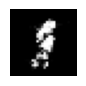

2024-06-28 10:37:02.161828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 71, Generator Loss: 0.7219188213348389, Discriminator Loss: 1.3400812149047852


2024-06-28 10:37:07.412792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 72, Generator Loss: 0.8017867207527161, Discriminator Loss: 1.3700740337371826


2024-06-28 10:37:12.501650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 73, Generator Loss: 0.6763492822647095, Discriminator Loss: 1.3877840042114258


2024-06-28 10:37:17.637846: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 74, Generator Loss: 0.7235779762268066, Discriminator Loss: 1.3481309413909912


2024-06-28 10:37:22.872905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 75, Generator Loss: 0.7394286394119263, Discriminator Loss: 1.3944289684295654


2024-06-28 10:37:28.100305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 76, Generator Loss: 0.7740657329559326, Discriminator Loss: 1.3817555904388428


2024-06-28 10:37:33.402461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 77, Generator Loss: 0.7631588578224182, Discriminator Loss: 1.355290412902832


2024-06-28 10:37:38.796869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 78, Generator Loss: 0.7275936603546143, Discriminator Loss: 1.4052364826202393


2024-06-28 10:37:44.064756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 79, Generator Loss: 0.7182061672210693, Discriminator Loss: 1.3105378150939941
Epoch 80, Generator Loss: 0.7667365074157715, Discriminator Loss: 1.3678258657455444


2024-06-28 10:37:49.364237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


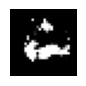

2024-06-28 10:37:54.692451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 81, Generator Loss: 0.775970995426178, Discriminator Loss: 1.3606603145599365


2024-06-28 10:38:00.030348: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 82, Generator Loss: 0.7670865058898926, Discriminator Loss: 1.3223538398742676


2024-06-28 10:38:05.289218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 83, Generator Loss: 0.7907199859619141, Discriminator Loss: 1.2828305959701538


2024-06-28 10:38:10.630117: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 84, Generator Loss: 0.8060626983642578, Discriminator Loss: 1.275892972946167


2024-06-28 10:38:15.085118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 85, Generator Loss: 0.7309196591377258, Discriminator Loss: 1.3170053958892822


2024-06-28 10:38:20.214967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 86, Generator Loss: 0.8157148361206055, Discriminator Loss: 1.2901933193206787


2024-06-28 10:38:25.370640: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 87, Generator Loss: 0.77777498960495, Discriminator Loss: 1.3499438762664795


2024-06-28 10:38:30.492398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 88, Generator Loss: 0.7498142719268799, Discriminator Loss: 1.3413424491882324


2024-06-28 10:38:35.771902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 89, Generator Loss: 0.7631900310516357, Discriminator Loss: 1.3120468854904175
Epoch 90, Generator Loss: 0.7697331309318542, Discriminator Loss: 1.3082853555679321


2024-06-28 10:38:40.926435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


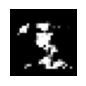

2024-06-28 10:38:46.025850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 91, Generator Loss: 0.7745711803436279, Discriminator Loss: 1.3384449481964111


2024-06-28 10:38:51.228705: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 92, Generator Loss: 0.813831627368927, Discriminator Loss: 1.2871809005737305


2024-06-28 10:38:56.408270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 93, Generator Loss: 0.8034852743148804, Discriminator Loss: 1.3053622245788574


2024-06-28 10:39:01.581118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 94, Generator Loss: 0.7402108907699585, Discriminator Loss: 1.279139757156372


2024-06-28 10:39:06.901820: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 95, Generator Loss: 0.7762486338615417, Discriminator Loss: 1.3136765956878662


2024-06-28 10:39:11.989830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 96, Generator Loss: 0.772834062576294, Discriminator Loss: 1.3003956079483032


2024-06-28 10:39:17.219390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 97, Generator Loss: 0.7803034782409668, Discriminator Loss: 1.3388440608978271


2024-06-28 10:39:22.509412: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 98, Generator Loss: 0.791945219039917, Discriminator Loss: 1.3186841011047363


2024-06-28 10:39:27.490742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 99, Generator Loss: 0.7927315831184387, Discriminator Loss: 1.3458263874053955
Epoch 100, Generator Loss: 0.7266495227813721, Discriminator Loss: 1.356748104095459


2024-06-28 10:39:32.648712: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


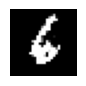

2024-06-28 10:39:37.969434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 101, Generator Loss: 0.7743121385574341, Discriminator Loss: 1.3333759307861328


2024-06-28 10:39:43.157266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 102, Generator Loss: 0.7582239508628845, Discriminator Loss: 1.3441295623779297


2024-06-28 10:39:48.467844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 103, Generator Loss: 0.7909652590751648, Discriminator Loss: 1.34275484085083


2024-06-28 10:39:53.718673: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 104, Generator Loss: 0.7423287630081177, Discriminator Loss: 1.3156087398529053


2024-06-28 10:39:59.028464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 105, Generator Loss: 0.7598536610603333, Discriminator Loss: 1.3531389236450195


2024-06-28 10:40:04.127435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 106, Generator Loss: 0.7316293120384216, Discriminator Loss: 1.3391616344451904


2024-06-28 10:40:09.368723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 107, Generator Loss: 0.7681068181991577, Discriminator Loss: 1.2999675273895264


2024-06-28 10:40:14.516915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 108, Generator Loss: 0.7922778129577637, Discriminator Loss: 1.3187910318374634


2024-06-28 10:40:19.696174: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 109, Generator Loss: 0.7625681757926941, Discriminator Loss: 1.3197375535964966
Epoch 110, Generator Loss: 0.765740156173706, Discriminator Loss: 1.3125240802764893


2024-06-28 10:40:24.976468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


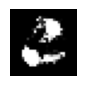

2024-06-28 10:40:30.187161: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 111, Generator Loss: 0.7583737373352051, Discriminator Loss: 1.3607268333435059


2024-06-28 10:40:35.426232: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 112, Generator Loss: 0.7656688690185547, Discriminator Loss: 1.343745231628418


2024-06-28 10:40:41.978910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 113, Generator Loss: 0.772894561290741, Discriminator Loss: 1.3500193357467651


2024-06-28 10:40:48.677424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 114, Generator Loss: 0.7805532813072205, Discriminator Loss: 1.340458869934082


2024-06-28 10:40:54.921480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 115, Generator Loss: 0.7904915809631348, Discriminator Loss: 1.33829665184021


2024-06-28 10:41:01.170753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 116, Generator Loss: 0.7730867862701416, Discriminator Loss: 1.334943175315857


2024-06-28 10:41:07.381920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 117, Generator Loss: 0.7323307991027832, Discriminator Loss: 1.385022521018982


2024-06-28 10:41:12.789775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 118, Generator Loss: 0.7222191691398621, Discriminator Loss: 1.3836886882781982


2024-06-28 10:41:17.969157: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 119, Generator Loss: 0.7518597841262817, Discriminator Loss: 1.346227765083313
Epoch 120, Generator Loss: 0.7634251117706299, Discriminator Loss: 1.3425920009613037


2024-06-28 10:41:23.308155: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


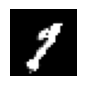

2024-06-28 10:41:28.537515: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 121, Generator Loss: 0.7683720588684082, Discriminator Loss: 1.3332418203353882


2024-06-28 10:41:33.780175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 122, Generator Loss: 0.7450999617576599, Discriminator Loss: 1.3955588340759277


2024-06-28 10:41:38.899672: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 123, Generator Loss: 0.7754983901977539, Discriminator Loss: 1.3607351779937744


2024-06-28 10:41:43.947974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 124, Generator Loss: 0.7693073749542236, Discriminator Loss: 1.3633451461791992


2024-06-28 10:41:48.935693: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 125, Generator Loss: 0.7606604695320129, Discriminator Loss: 1.3330986499786377


2024-06-28 10:41:54.050051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 126, Generator Loss: 0.7212233543395996, Discriminator Loss: 1.3540217876434326


2024-06-28 10:41:59.128448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 127, Generator Loss: 0.7579591274261475, Discriminator Loss: 1.342491865158081


2024-06-28 10:42:04.334411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 128, Generator Loss: 0.7532355785369873, Discriminator Loss: 1.3717427253723145


2024-06-28 10:42:09.732126: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 129, Generator Loss: 0.7566494345664978, Discriminator Loss: 1.3459885120391846
Epoch 130, Generator Loss: 0.729516863822937, Discriminator Loss: 1.3582874536514282


2024-06-28 10:42:14.996021: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


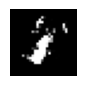

2024-06-28 10:42:20.340005: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 131, Generator Loss: 0.7609784603118896, Discriminator Loss: 1.317417860031128


2024-06-28 10:42:25.526366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 132, Generator Loss: 0.7367057204246521, Discriminator Loss: 1.3489465713500977


2024-06-28 10:42:30.324586: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 133, Generator Loss: 0.7807965874671936, Discriminator Loss: 1.3274126052856445


2024-06-28 10:42:35.446711: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 134, Generator Loss: 0.7582939267158508, Discriminator Loss: 1.3284311294555664


2024-06-28 10:42:40.667873: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 135, Generator Loss: 0.7696840167045593, Discriminator Loss: 1.340721607208252


2024-06-28 10:42:45.898674: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 136, Generator Loss: 0.8104002475738525, Discriminator Loss: 1.3353320360183716


2024-06-28 10:42:51.090479: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 137, Generator Loss: 0.7659000158309937, Discriminator Loss: 1.313488245010376


2024-06-28 10:42:56.065128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 138, Generator Loss: 0.7689176797866821, Discriminator Loss: 1.3569118976593018


2024-06-28 10:43:01.011507: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 139, Generator Loss: 0.8008959293365479, Discriminator Loss: 1.3677127361297607
Epoch 140, Generator Loss: 0.7618024349212646, Discriminator Loss: 1.3546899557113647


2024-06-28 10:43:06.002627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


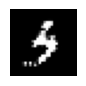

2024-06-28 10:43:11.065078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 141, Generator Loss: 0.7526755332946777, Discriminator Loss: 1.3111631870269775


2024-06-28 10:43:16.198537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 142, Generator Loss: 0.7349828481674194, Discriminator Loss: 1.361156940460205


2024-06-28 10:43:21.252463: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 143, Generator Loss: 0.7472081184387207, Discriminator Loss: 1.3346623182296753


2024-06-28 10:43:26.440731: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 144, Generator Loss: 0.7433440685272217, Discriminator Loss: 1.354714274406433


2024-06-28 10:43:31.262765: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 145, Generator Loss: 0.7639026641845703, Discriminator Loss: 1.3573253154754639


2024-06-28 10:43:36.513136: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 146, Generator Loss: 0.7610118389129639, Discriminator Loss: 1.3376179933547974


2024-06-28 10:43:41.270772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 147, Generator Loss: 0.7462990880012512, Discriminator Loss: 1.364011287689209


2024-06-28 10:43:46.365481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 148, Generator Loss: 0.7401875257492065, Discriminator Loss: 1.344417691230774


2024-06-28 10:43:51.608588: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 149, Generator Loss: 0.7624342441558838, Discriminator Loss: 1.3569573163986206
Epoch 150, Generator Loss: 0.7896375060081482, Discriminator Loss: 1.3383300304412842


2024-06-28 10:43:56.817466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


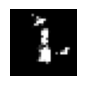

2024-06-28 10:44:02.109794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 151, Generator Loss: 0.7443164587020874, Discriminator Loss: 1.3539992570877075


2024-06-28 10:44:07.454726: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 152, Generator Loss: 0.7330818176269531, Discriminator Loss: 1.4253716468811035


2024-06-28 10:44:12.731611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 153, Generator Loss: 0.7799069285392761, Discriminator Loss: 1.3415734767913818


2024-06-28 10:44:17.758070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 154, Generator Loss: 0.7640479803085327, Discriminator Loss: 1.3330934047698975


2024-06-28 10:44:22.913914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 155, Generator Loss: 0.7562196254730225, Discriminator Loss: 1.3585959672927856


2024-06-28 10:44:27.299040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 156, Generator Loss: 0.7598713040351868, Discriminator Loss: 1.3201888799667358


2024-06-28 10:44:32.442267: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 157, Generator Loss: 0.7438290119171143, Discriminator Loss: 1.3407244682312012


2024-06-28 10:44:37.619241: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 158, Generator Loss: 0.7267097234725952, Discriminator Loss: 1.3541476726531982


2024-06-28 10:44:42.748638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 159, Generator Loss: 0.7519258260726929, Discriminator Loss: 1.3467236757278442
Epoch 160, Generator Loss: 0.7688446044921875, Discriminator Loss: 1.377668857574463


2024-06-28 10:44:48.092283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


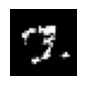

2024-06-28 10:44:55.744925: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 161, Generator Loss: 0.7425904870033264, Discriminator Loss: 1.3791844844818115


2024-06-28 10:45:02.956502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 162, Generator Loss: 0.779503583908081, Discriminator Loss: 1.352553367614746


2024-06-28 10:45:09.430095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 163, Generator Loss: 0.7343635559082031, Discriminator Loss: 1.371631145477295


2024-06-28 10:45:17.010592: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 164, Generator Loss: 0.7429804801940918, Discriminator Loss: 1.3451837301254272


2024-06-28 10:45:23.741531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 165, Generator Loss: 0.743497371673584, Discriminator Loss: 1.36374032497406


2024-06-28 10:45:29.345754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 166, Generator Loss: 0.79537034034729, Discriminator Loss: 1.3319084644317627


2024-06-28 10:45:34.268139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 167, Generator Loss: 0.7413602471351624, Discriminator Loss: 1.3640203475952148


2024-06-28 10:45:39.181476: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 168, Generator Loss: 0.7477854490280151, Discriminator Loss: 1.3458170890808105


2024-06-28 10:45:44.086242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 169, Generator Loss: 0.7250581979751587, Discriminator Loss: 1.3833556175231934
Epoch 170, Generator Loss: 0.7222340106964111, Discriminator Loss: 1.360400915145874


2024-06-28 10:45:48.630962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


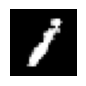

2024-06-28 10:45:53.738923: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 171, Generator Loss: 0.7179911136627197, Discriminator Loss: 1.3565016984939575


2024-06-28 10:45:58.347488: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 172, Generator Loss: 0.7388715147972107, Discriminator Loss: 1.3644962310791016


2024-06-28 10:46:02.935921: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 173, Generator Loss: 0.7260020971298218, Discriminator Loss: 1.3334615230560303


2024-06-28 10:46:07.795927: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 174, Generator Loss: 0.7594976425170898, Discriminator Loss: 1.3589019775390625


2024-06-28 10:46:12.345603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 175, Generator Loss: 0.7827642560005188, Discriminator Loss: 1.3432706594467163


2024-06-28 10:46:17.419140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 176, Generator Loss: 0.7434779405593872, Discriminator Loss: 1.341517686843872


2024-06-28 10:46:22.671030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 177, Generator Loss: 0.778836727142334, Discriminator Loss: 1.2989842891693115


2024-06-28 10:46:27.851517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 178, Generator Loss: 0.74845290184021, Discriminator Loss: 1.3449606895446777


2024-06-28 10:46:32.511895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 179, Generator Loss: 0.7879827618598938, Discriminator Loss: 1.340288758277893
Epoch 180, Generator Loss: 0.7587152719497681, Discriminator Loss: 1.3536972999572754


2024-06-28 10:46:37.515826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


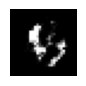

2024-06-28 10:46:42.554926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 181, Generator Loss: 0.7059105634689331, Discriminator Loss: 1.3802530765533447


2024-06-28 10:46:47.125867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 182, Generator Loss: 0.7303370237350464, Discriminator Loss: 1.3325309753417969


2024-06-28 10:46:52.005453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 183, Generator Loss: 0.7217197418212891, Discriminator Loss: 1.3718888759613037


2024-06-28 10:46:59.336682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 184, Generator Loss: 0.7438998818397522, Discriminator Loss: 1.374725341796875


2024-06-28 10:47:06.320002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 185, Generator Loss: 0.7343379259109497, Discriminator Loss: 1.3497262001037598


2024-06-28 10:47:11.636423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 186, Generator Loss: 0.7826021909713745, Discriminator Loss: 1.3226064443588257


2024-06-28 10:47:16.784417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 187, Generator Loss: 0.7318822741508484, Discriminator Loss: 1.3758699893951416


2024-06-28 10:47:21.506708: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 188, Generator Loss: 0.7443763017654419, Discriminator Loss: 1.3477784395217896


2024-06-28 10:47:26.322830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 189, Generator Loss: 0.738400399684906, Discriminator Loss: 1.3333566188812256
Epoch 190, Generator Loss: 0.7523640394210815, Discriminator Loss: 1.3437235355377197


2024-06-28 10:47:31.493984: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


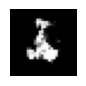

2024-06-28 10:47:36.265382: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 191, Generator Loss: 0.7332462072372437, Discriminator Loss: 1.3487324714660645


2024-06-28 10:47:41.442134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 192, Generator Loss: 0.743097186088562, Discriminator Loss: 1.378635287284851


2024-06-28 10:47:46.685317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 193, Generator Loss: 0.7264952659606934, Discriminator Loss: 1.327568531036377


2024-06-28 10:47:51.855375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 194, Generator Loss: 0.7327662706375122, Discriminator Loss: 1.3724193572998047


2024-06-28 10:47:56.716582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 195, Generator Loss: 0.7354291081428528, Discriminator Loss: 1.3605493307113647


2024-06-28 10:48:01.649673: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 196, Generator Loss: 0.7534126043319702, Discriminator Loss: 1.3563106060028076


2024-06-28 10:48:06.303127: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 197, Generator Loss: 0.7568758726119995, Discriminator Loss: 1.3397808074951172


2024-06-28 10:48:10.998061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 198, Generator Loss: 0.7375097274780273, Discriminator Loss: 1.3490417003631592


2024-06-28 10:48:15.402911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 199, Generator Loss: 0.7428845763206482, Discriminator Loss: 1.3558177947998047
Epoch 200, Generator Loss: 0.7159311771392822, Discriminator Loss: 1.3910800218582153


2024-06-28 10:48:20.462537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


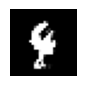

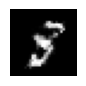

In [22]:
# Prepare the MNIST dataset
batch_size = 256
mnist_dataset = prepare_dataset(X, batch_size)

# Train the GAN
epochs = 200

# Define the directory where images will be saved
save_directory = 'training_images_' + str(epochs) + '_epochs_time_' + str(int(time.time()))

model_save_directory = 'saved_models'
loss_save_file = 'training_losses.npz'

# Create the directories if they don't exist
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)
    


train(mnist_dataset, epochs, save_directory, model_save_directory, loss_save_file)


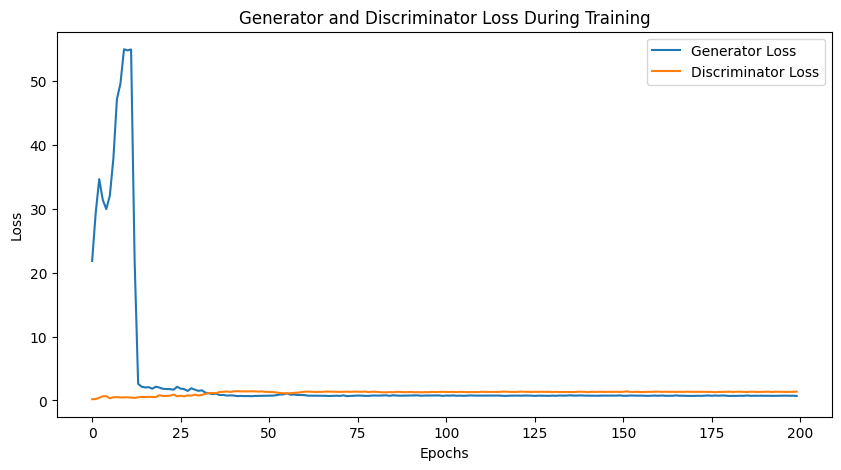

In [23]:
# Function to load and plot the losses
def plot_losses(loss_file):
    data = np.load(loss_file)
    gen_losses = data['gen_losses']
    disc_losses = data['disc_losses']

    plt.figure(figsize=(10, 5))
    plt.plot(gen_losses, label='Generator Loss')
    plt.plot(disc_losses, label='Discriminator Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Generator and Discriminator Loss During Training')
    plt.show()

# Plot the losses after training
plot_losses(loss_save_file)

In [24]:
# Function to generate and display images using the trained generator model
def generate_images(generator_model, num_images, latent_space_size):
    random_vectors = get_random_input_vector(latent_space_size, batch_size=num_images)
    generated_images = generator_model(random_vectors, training=False)

    fig = plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.show()

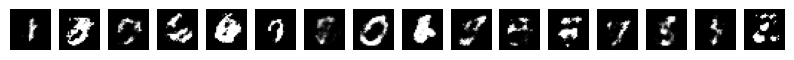

In [25]:
num_images_to_generate = 16

generator = keras.models.load_model('saved_models/generator_epoch_0200latent_space_size10.h5')


generate_images(generator, num_images_to_generate, latent_space_size)


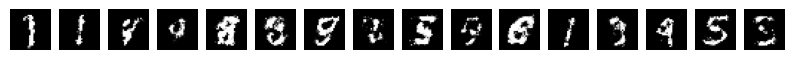

In [26]:
# Load the trained generator model
generator = keras.models.load_model('saved_models/generator_epoch_0060latent_space_size10.h5')

# Generate and display images
num_images_to_generate = 16
latent_space_size = 10  # Define the latent space size used during training
generate_images(generator, num_images_to_generate, latent_space_size)

In [27]:
latent_space_size = 2

# Optimizers for the generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Create the discriminator model
discriminator = discriminator_model()
discriminator.summary()

# Create the generator model with the new latent space size
generator = make_generator_model(latent_space_size)
generator.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 533,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 784)            │       803,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,584 (5.73 MB)

 Trainable params: 1,497,744 (5.71 MB)

 Non-trainable params: 3,840 (15.00 KB)

2024-06-28 10:48:26.365833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1, Generator Loss: 0.7400723695755005, Discriminator Loss: 1.3432965278625488


2024-06-28 10:48:30.892071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2, Generator Loss: 0.7977185249328613, Discriminator Loss: 1.3130450248718262


2024-06-28 10:48:36.067414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 3, Generator Loss: 0.7713459730148315, Discriminator Loss: 1.3253982067108154


2024-06-28 10:48:41.059998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4, Generator Loss: 0.7535371780395508, Discriminator Loss: 1.3545482158660889


2024-06-28 10:48:45.538371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 5, Generator Loss: 0.7559743523597717, Discriminator Loss: 1.3197741508483887


2024-06-28 10:48:50.101871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6, Generator Loss: 0.7556653022766113, Discriminator Loss: 1.3485374450683594


2024-06-28 10:48:54.300846: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 7, Generator Loss: 0.7784436941146851, Discriminator Loss: 1.3017135858535767


2024-06-28 10:48:59.544893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8, Generator Loss: 0.7526963949203491, Discriminator Loss: 1.362549901008606


2024-06-28 10:49:04.732780: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 9, Generator Loss: 0.7520489692687988, Discriminator Loss: 1.33005690574646
Epoch 10, Generator Loss: 0.7517496347427368, Discriminator Loss: 1.3534481525421143


2024-06-28 10:49:09.959382: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


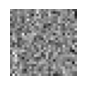

2024-06-28 10:49:15.388898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 11, Generator Loss: 0.7614402770996094, Discriminator Loss: 1.3606822490692139


2024-06-28 10:49:20.663411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 12, Generator Loss: 0.7172679901123047, Discriminator Loss: 1.3718732595443726


2024-06-28 10:49:25.994785: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 13, Generator Loss: 0.7447235584259033, Discriminator Loss: 1.3357458114624023


2024-06-28 10:49:31.268630: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 14, Generator Loss: 0.718788743019104, Discriminator Loss: 1.3281843662261963


2024-06-28 10:49:36.452193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 15, Generator Loss: 0.7552393078804016, Discriminator Loss: 1.3810805082321167


2024-06-28 10:49:41.814478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16, Generator Loss: 0.7508347034454346, Discriminator Loss: 1.3223278522491455


2024-06-28 10:49:46.809044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 17, Generator Loss: 0.7642520666122437, Discriminator Loss: 1.3436551094055176


2024-06-28 10:49:51.771276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 18, Generator Loss: 0.730011522769928, Discriminator Loss: 1.3349545001983643


2024-06-28 10:49:56.818140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 19, Generator Loss: 0.7563445568084717, Discriminator Loss: 1.3428772687911987
Epoch 20, Generator Loss: 0.7607729434967041, Discriminator Loss: 1.3744933605194092


2024-06-28 10:50:01.774486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


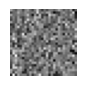

2024-06-28 10:50:06.774592: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 21, Generator Loss: 0.7615771889686584, Discriminator Loss: 1.345119833946228


2024-06-28 10:50:11.731512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 22, Generator Loss: 0.7378817796707153, Discriminator Loss: 1.336780071258545


2024-06-28 10:50:16.436869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 23, Generator Loss: 0.7696163058280945, Discriminator Loss: 1.3407354354858398


2024-06-28 10:50:21.317478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 24, Generator Loss: 0.7531678676605225, Discriminator Loss: 1.3853638172149658


2024-06-28 10:50:26.448085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 25, Generator Loss: 0.741887629032135, Discriminator Loss: 1.3534629344940186


2024-06-28 10:50:31.720888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 26, Generator Loss: 0.7543453574180603, Discriminator Loss: 1.3425995111465454


2024-06-28 10:50:36.648286: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 27, Generator Loss: 0.7684732675552368, Discriminator Loss: 1.361769199371338


2024-06-28 10:50:41.845052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 28, Generator Loss: 0.7587966322898865, Discriminator Loss: 1.3754997253417969


2024-06-28 10:50:47.103678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 29, Generator Loss: 0.7709621787071228, Discriminator Loss: 1.3641581535339355
Epoch 30, Generator Loss: 0.7278457283973694, Discriminator Loss: 1.3160892724990845


2024-06-28 10:50:52.064448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


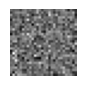

2024-06-28 10:50:57.207644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 31, Generator Loss: 0.7517615556716919, Discriminator Loss: 1.4024721384048462


2024-06-28 10:51:02.235030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 32, Generator Loss: 0.7285696268081665, Discriminator Loss: 1.382507562637329


2024-06-28 10:51:07.358973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 33, Generator Loss: 0.7336273193359375, Discriminator Loss: 1.3516132831573486


2024-06-28 10:51:12.262648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 34, Generator Loss: 0.7632555365562439, Discriminator Loss: 1.349713921546936


2024-06-28 10:51:17.518014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 35, Generator Loss: 0.7583138942718506, Discriminator Loss: 1.366389513015747


2024-06-28 10:51:22.750108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 36, Generator Loss: 0.7123841643333435, Discriminator Loss: 1.379745602607727


2024-06-28 10:51:28.028948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 37, Generator Loss: 0.7612301707267761, Discriminator Loss: 1.3174729347229004


2024-06-28 10:51:33.218246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 38, Generator Loss: 0.7105803489685059, Discriminator Loss: 1.3481613397598267


2024-06-28 10:51:38.284937: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 39, Generator Loss: 0.7330041527748108, Discriminator Loss: 1.3567614555358887
Epoch 40, Generator Loss: 0.7512757778167725, Discriminator Loss: 1.3822249174118042


2024-06-28 10:51:43.408243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


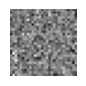

2024-06-28 10:51:48.275272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 41, Generator Loss: 0.7103365659713745, Discriminator Loss: 1.3419939279556274


2024-06-28 10:51:53.498688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 42, Generator Loss: 0.7530699968338013, Discriminator Loss: 1.3391389846801758


2024-06-28 10:51:58.735182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 43, Generator Loss: 0.7121834754943848, Discriminator Loss: 1.3705565929412842


2024-06-28 10:52:03.845288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 44, Generator Loss: 0.7623542547225952, Discriminator Loss: 1.3847236633300781


2024-06-28 10:52:09.041685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 45, Generator Loss: 0.7294622659683228, Discriminator Loss: 1.356351375579834


2024-06-28 10:52:14.310620: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 46, Generator Loss: 0.7525646686553955, Discriminator Loss: 1.3645966053009033


2024-06-28 10:52:19.568260: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 47, Generator Loss: 0.7342956066131592, Discriminator Loss: 1.3364185094833374


2024-06-28 10:52:24.580748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 48, Generator Loss: 0.7628057599067688, Discriminator Loss: 1.3575208187103271


2024-06-28 10:52:29.328686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 49, Generator Loss: 0.7174878120422363, Discriminator Loss: 1.3549962043762207
Epoch 50, Generator Loss: 0.7476813197135925, Discriminator Loss: 1.3681235313415527


2024-06-28 10:52:34.532691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


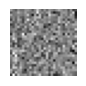

2024-06-28 10:52:39.834464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 51, Generator Loss: 0.7661491632461548, Discriminator Loss: 1.3454444408416748


2024-06-28 10:52:44.821230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 52, Generator Loss: 0.760159969329834, Discriminator Loss: 1.3650155067443848


2024-06-28 10:52:49.829335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 53, Generator Loss: 0.7089006900787354, Discriminator Loss: 1.3408589363098145


2024-06-28 10:52:54.842250: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 54, Generator Loss: 0.7280207872390747, Discriminator Loss: 1.330180048942566


2024-06-28 10:53:00.101571: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 55, Generator Loss: 0.7496103644371033, Discriminator Loss: 1.369951844215393


2024-06-28 10:53:05.020299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 56, Generator Loss: 0.726189911365509, Discriminator Loss: 1.3660213947296143


2024-06-28 10:53:10.051585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 57, Generator Loss: 0.7597019076347351, Discriminator Loss: 1.3625948429107666


2024-06-28 10:53:15.252525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 58, Generator Loss: 0.7037322521209717, Discriminator Loss: 1.3478153944015503


2024-06-28 10:53:20.281936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 59, Generator Loss: 0.7094937562942505, Discriminator Loss: 1.3669981956481934
Epoch 60, Generator Loss: 0.7382557392120361, Discriminator Loss: 1.3681201934814453


2024-06-28 10:53:25.518867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


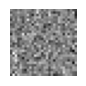

2024-06-28 10:53:30.294770: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 61, Generator Loss: 0.7331243753433228, Discriminator Loss: 1.3691836595535278


2024-06-28 10:53:35.125083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 62, Generator Loss: 0.7490979433059692, Discriminator Loss: 1.3364169597625732


2024-06-28 10:53:41.037514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 63, Generator Loss: 0.7456332445144653, Discriminator Loss: 1.3633921146392822


2024-06-28 10:53:49.704080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 64, Generator Loss: 0.7225916385650635, Discriminator Loss: 1.3565442562103271


2024-06-28 10:53:56.864147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 65, Generator Loss: 0.7482560873031616, Discriminator Loss: 1.362029790878296


2024-06-28 10:54:03.605807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 66, Generator Loss: 0.7377115488052368, Discriminator Loss: 1.4066144227981567


2024-06-28 10:54:09.750234: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 67, Generator Loss: 0.717464804649353, Discriminator Loss: 1.3512145280838013


2024-06-28 10:54:15.854022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 68, Generator Loss: 0.7580219507217407, Discriminator Loss: 1.3639687299728394


2024-06-28 10:54:22.037686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 69, Generator Loss: 0.7422375082969666, Discriminator Loss: 1.3429055213928223
Epoch 70, Generator Loss: 0.737144947052002, Discriminator Loss: 1.3566159009933472


2024-06-28 10:54:28.222727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


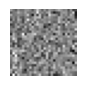

2024-06-28 10:54:34.228924: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 71, Generator Loss: 0.7533893585205078, Discriminator Loss: 1.3079431056976318


2024-06-28 10:54:39.500994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 72, Generator Loss: 0.7391664385795593, Discriminator Loss: 1.3712432384490967


2024-06-28 10:54:44.819899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 73, Generator Loss: 0.728985071182251, Discriminator Loss: 1.3738782405853271


2024-06-28 10:54:50.202685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 74, Generator Loss: 0.7598339915275574, Discriminator Loss: 1.3332717418670654


2024-06-28 10:54:55.447266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 75, Generator Loss: 0.7349869012832642, Discriminator Loss: 1.349932074546814


2024-06-28 10:55:00.726955: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 76, Generator Loss: 0.7348677515983582, Discriminator Loss: 1.4022853374481201


2024-06-28 10:55:05.856456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 77, Generator Loss: 0.7072829604148865, Discriminator Loss: 1.3722152709960938


2024-06-28 10:55:10.914030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 78, Generator Loss: 0.7129831314086914, Discriminator Loss: 1.3692309856414795


2024-06-28 10:55:16.163762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 79, Generator Loss: 0.7303199172019958, Discriminator Loss: 1.3323969841003418
Epoch 80, Generator Loss: 0.7469868659973145, Discriminator Loss: 1.3457667827606201


2024-06-28 10:55:20.698984: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


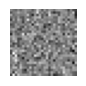

2024-06-28 10:55:25.654184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 81, Generator Loss: 0.7178915739059448, Discriminator Loss: 1.368733286857605


2024-06-28 10:55:30.770216: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 82, Generator Loss: 0.7543262243270874, Discriminator Loss: 1.3729517459869385


2024-06-28 10:55:35.581179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 83, Generator Loss: 0.781349778175354, Discriminator Loss: 1.3930535316467285


2024-06-28 10:55:40.611394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 84, Generator Loss: 0.7547721862792969, Discriminator Loss: 1.3692578077316284


2024-06-28 10:55:45.901793: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 85, Generator Loss: 0.7566514611244202, Discriminator Loss: 1.3481829166412354


2024-06-28 10:55:50.920575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 86, Generator Loss: 0.7380639314651489, Discriminator Loss: 1.3767986297607422


2024-06-28 10:55:55.834915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 87, Generator Loss: 0.7457417249679565, Discriminator Loss: 1.335623025894165


2024-06-28 10:56:00.521264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 88, Generator Loss: 0.7328976988792419, Discriminator Loss: 1.3487355709075928


2024-06-28 10:56:05.052790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 89, Generator Loss: 0.7371944189071655, Discriminator Loss: 1.3484132289886475
Epoch 90, Generator Loss: 0.7153578996658325, Discriminator Loss: 1.3822743892669678


2024-06-28 10:56:09.977813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


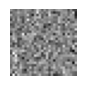

2024-06-28 10:56:14.780176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 91, Generator Loss: 0.7356881499290466, Discriminator Loss: 1.377906322479248


2024-06-28 10:56:19.408863: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 92, Generator Loss: 0.7385464906692505, Discriminator Loss: 1.375394582748413


2024-06-28 10:56:24.306784: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 93, Generator Loss: 0.7502191066741943, Discriminator Loss: 1.3523986339569092


2024-06-28 10:56:29.248895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 94, Generator Loss: 0.7292348146438599, Discriminator Loss: 1.3692059516906738


2024-06-28 10:56:33.991286: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 95, Generator Loss: 0.711858868598938, Discriminator Loss: 1.386612892150879


2024-06-28 10:56:38.888523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 96, Generator Loss: 0.7663400769233704, Discriminator Loss: 1.3677421808242798


2024-06-28 10:56:44.136656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 97, Generator Loss: 0.7435275912284851, Discriminator Loss: 1.372736930847168


2024-06-28 10:56:49.209563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 98, Generator Loss: 0.7292929291725159, Discriminator Loss: 1.3815451860427856


2024-06-28 10:56:54.387777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 99, Generator Loss: 0.7330062389373779, Discriminator Loss: 1.357980728149414
Epoch 100, Generator Loss: 0.7470601797103882, Discriminator Loss: 1.3510918617248535


2024-06-28 10:56:59.247186: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


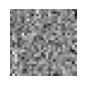

2024-06-28 10:57:04.268874: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 101, Generator Loss: 0.7330576181411743, Discriminator Loss: 1.3887962102890015


2024-06-28 10:57:09.288554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 102, Generator Loss: 0.6936465501785278, Discriminator Loss: 1.3825702667236328


2024-06-28 10:57:14.120776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 103, Generator Loss: 0.7195740938186646, Discriminator Loss: 1.3374264240264893


2024-06-28 10:57:19.068951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 104, Generator Loss: 0.7380351424217224, Discriminator Loss: 1.3685485124588013


2024-06-28 10:57:24.349645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 105, Generator Loss: 0.7605781555175781, Discriminator Loss: 1.3707479238510132


2024-06-28 10:57:29.651134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 106, Generator Loss: 0.7357146739959717, Discriminator Loss: 1.396866798400879


2024-06-28 10:57:34.823960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 107, Generator Loss: 0.6863689422607422, Discriminator Loss: 1.3786921501159668


2024-06-28 10:57:39.590957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 108, Generator Loss: 0.7152587175369263, Discriminator Loss: 1.3866969347000122


2024-06-28 10:57:44.745949: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 109, Generator Loss: 0.7381644248962402, Discriminator Loss: 1.3862695693969727
Epoch 110, Generator Loss: 0.7057350873947144, Discriminator Loss: 1.3929481506347656


2024-06-28 10:57:49.603495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


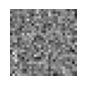

2024-06-28 10:57:54.057256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 111, Generator Loss: 0.7414484024047852, Discriminator Loss: 1.377326488494873


2024-06-28 10:57:58.727547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 112, Generator Loss: 0.7204166054725647, Discriminator Loss: 1.3715934753417969


2024-06-28 10:58:03.950525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 113, Generator Loss: 0.709397554397583, Discriminator Loss: 1.3468537330627441


2024-06-28 10:58:09.076755: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 114, Generator Loss: 0.7549193501472473, Discriminator Loss: 1.3639330863952637


2024-06-28 10:58:14.205885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 115, Generator Loss: 0.7132953405380249, Discriminator Loss: 1.3789767026901245


2024-06-28 10:58:19.345334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 116, Generator Loss: 0.6991212368011475, Discriminator Loss: 1.394763469696045


2024-06-28 10:58:24.444163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 117, Generator Loss: 0.7359511256217957, Discriminator Loss: 1.3722381591796875


2024-06-28 10:58:29.246207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 118, Generator Loss: 0.7378853559494019, Discriminator Loss: 1.355123519897461


2024-06-28 10:58:34.038439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 119, Generator Loss: 0.7228322625160217, Discriminator Loss: 1.3917675018310547
Epoch 120, Generator Loss: 0.7149151563644409, Discriminator Loss: 1.365755558013916


2024-06-28 10:58:38.685891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


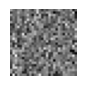

2024-06-28 10:58:43.742675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 121, Generator Loss: 0.6993603706359863, Discriminator Loss: 1.361363172531128


2024-06-28 10:58:48.719957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 122, Generator Loss: 0.7258415222167969, Discriminator Loss: 1.3679556846618652


2024-06-28 10:58:53.656342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 123, Generator Loss: 0.7107042074203491, Discriminator Loss: 1.386409044265747


2024-06-28 10:58:58.551651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 124, Generator Loss: 0.7366607785224915, Discriminator Loss: 1.3817567825317383


2024-06-28 10:59:03.392262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 125, Generator Loss: 0.7131192088127136, Discriminator Loss: 1.371432900428772


2024-06-28 10:59:08.226203: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 126, Generator Loss: 0.7467522621154785, Discriminator Loss: 1.365771770477295


2024-06-28 10:59:13.316514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 127, Generator Loss: 0.7387831211090088, Discriminator Loss: 1.3646389245986938


2024-06-28 10:59:18.487260: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 128, Generator Loss: 0.7276078462600708, Discriminator Loss: 1.3561742305755615


2024-06-28 10:59:23.741099: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 129, Generator Loss: 0.7429454326629639, Discriminator Loss: 1.3713643550872803
Epoch 130, Generator Loss: 0.6882649660110474, Discriminator Loss: 1.3808701038360596


2024-06-28 10:59:28.434643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


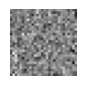

2024-06-28 10:59:33.567916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 131, Generator Loss: 0.7395397424697876, Discriminator Loss: 1.366744041442871


2024-06-28 10:59:38.780642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 132, Generator Loss: 0.7115076780319214, Discriminator Loss: 1.384027123451233


2024-06-28 10:59:43.708830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 133, Generator Loss: 0.7199317216873169, Discriminator Loss: 1.3640620708465576


2024-06-28 10:59:48.697579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 134, Generator Loss: 0.7116451263427734, Discriminator Loss: 1.3620336055755615


2024-06-28 10:59:53.562995: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 135, Generator Loss: 0.7301227450370789, Discriminator Loss: 1.3681105375289917


2024-06-28 10:59:58.453548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 136, Generator Loss: 0.715703010559082, Discriminator Loss: 1.3597991466522217


2024-06-28 11:00:03.520756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 137, Generator Loss: 0.7293910980224609, Discriminator Loss: 1.3543660640716553


2024-06-28 11:00:08.662992: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 138, Generator Loss: 0.750446081161499, Discriminator Loss: 1.359837532043457


2024-06-28 11:00:13.505605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 139, Generator Loss: 0.7305163145065308, Discriminator Loss: 1.3652575016021729
Epoch 140, Generator Loss: 0.7197297811508179, Discriminator Loss: 1.3653974533081055


2024-06-28 11:00:18.764624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


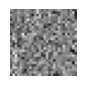

2024-06-28 11:00:23.889116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 141, Generator Loss: 0.7231550216674805, Discriminator Loss: 1.3703298568725586


2024-06-28 11:00:28.884518: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 142, Generator Loss: 0.7237973213195801, Discriminator Loss: 1.3588871955871582


2024-06-28 11:00:33.729474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 143, Generator Loss: 0.7088930010795593, Discriminator Loss: 1.379420518875122


2024-06-28 11:00:38.515451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 144, Generator Loss: 0.7112117409706116, Discriminator Loss: 1.3660253286361694


2024-06-28 11:00:43.294035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 145, Generator Loss: 0.7444279193878174, Discriminator Loss: 1.3743436336517334


2024-06-28 11:00:48.310228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 146, Generator Loss: 0.7005735039710999, Discriminator Loss: 1.3564954996109009


2024-06-28 11:00:52.858509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 147, Generator Loss: 0.7500298023223877, Discriminator Loss: 1.3667292594909668


2024-06-28 11:00:57.918725: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 148, Generator Loss: 0.7309072613716125, Discriminator Loss: 1.3791594505310059


2024-06-28 11:01:03.041198: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 149, Generator Loss: 0.7300150394439697, Discriminator Loss: 1.3757109642028809
Epoch 150, Generator Loss: 0.7062057256698608, Discriminator Loss: 1.3662669658660889


2024-06-28 11:01:08.339755: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


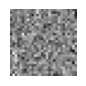

2024-06-28 11:01:13.487093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 151, Generator Loss: 0.7425333261489868, Discriminator Loss: 1.3723289966583252


2024-06-28 11:01:18.770372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 152, Generator Loss: 0.7309212684631348, Discriminator Loss: 1.3837121725082397


2024-06-28 11:01:24.169889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 153, Generator Loss: 0.7379811406135559, Discriminator Loss: 1.3600317239761353


2024-06-28 11:01:29.118622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 154, Generator Loss: 0.7127866148948669, Discriminator Loss: 1.3571860790252686


2024-06-28 11:01:34.013590: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 155, Generator Loss: 0.7346898317337036, Discriminator Loss: 1.3660614490509033


2024-06-28 11:01:38.917209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 156, Generator Loss: 0.7169677019119263, Discriminator Loss: 1.3665473461151123


2024-06-28 11:01:44.186090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 157, Generator Loss: 0.7230326533317566, Discriminator Loss: 1.3654367923736572


2024-06-28 11:01:49.301587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 158, Generator Loss: 0.7118134498596191, Discriminator Loss: 1.356980562210083


2024-06-28 11:01:54.489085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 159, Generator Loss: 0.7300294637680054, Discriminator Loss: 1.3683443069458008
Epoch 160, Generator Loss: 0.7263343334197998, Discriminator Loss: 1.372406005859375


2024-06-28 11:01:59.260883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


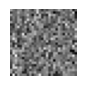

2024-06-28 11:02:04.399974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 161, Generator Loss: 0.7255589962005615, Discriminator Loss: 1.369942545890808


2024-06-28 11:02:09.485742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 162, Generator Loss: 0.69593745470047, Discriminator Loss: 1.3788551092147827


2024-06-28 11:02:14.462034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 163, Generator Loss: 0.7236000299453735, Discriminator Loss: 1.382493257522583


2024-06-28 11:02:19.635767: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 164, Generator Loss: 0.7337150573730469, Discriminator Loss: 1.3755369186401367


2024-06-28 11:02:24.637182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 165, Generator Loss: 0.6999232769012451, Discriminator Loss: 1.364359736442566


2024-06-28 11:02:29.828144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 166, Generator Loss: 0.7090405225753784, Discriminator Loss: 1.3513691425323486


2024-06-28 11:02:34.956505: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 167, Generator Loss: 0.7028407454490662, Discriminator Loss: 1.3739631175994873


2024-06-28 11:02:40.202456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 168, Generator Loss: 0.7344379425048828, Discriminator Loss: 1.3814104795455933


2024-06-28 11:02:45.394751: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 169, Generator Loss: 0.7337128520011902, Discriminator Loss: 1.3669109344482422
Epoch 170, Generator Loss: 0.7061386108398438, Discriminator Loss: 1.3757283687591553


2024-06-28 11:02:50.426632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


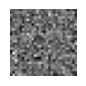

2024-06-28 11:02:55.322051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 171, Generator Loss: 0.7224762439727783, Discriminator Loss: 1.3567593097686768


2024-06-28 11:03:00.262027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 172, Generator Loss: 0.7141972184181213, Discriminator Loss: 1.3709920644760132


2024-06-28 11:03:05.059715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 173, Generator Loss: 0.7279633283615112, Discriminator Loss: 1.374415636062622


2024-06-28 11:03:09.970052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 174, Generator Loss: 0.7131782174110413, Discriminator Loss: 1.3674131631851196


2024-06-28 11:03:14.960028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 175, Generator Loss: 0.7196509838104248, Discriminator Loss: 1.3547860383987427


2024-06-28 11:03:20.090826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 176, Generator Loss: 0.7090500593185425, Discriminator Loss: 1.3777910470962524


2024-06-28 11:03:27.691609: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 177, Generator Loss: 0.7299750447273254, Discriminator Loss: 1.3898842334747314


2024-06-28 11:03:34.436367: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 178, Generator Loss: 0.7251922488212585, Discriminator Loss: 1.37235689163208


2024-06-28 11:03:39.447077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 179, Generator Loss: 0.7256830930709839, Discriminator Loss: 1.357635498046875
Epoch 180, Generator Loss: 0.7178882360458374, Discriminator Loss: 1.3779926300048828


2024-06-28 11:03:44.227549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


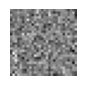

2024-06-28 11:03:49.114649: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 181, Generator Loss: 0.7276225686073303, Discriminator Loss: 1.356715440750122


2024-06-28 11:03:54.283240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 182, Generator Loss: 0.7187011241912842, Discriminator Loss: 1.3824400901794434


2024-06-28 11:03:59.385794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 183, Generator Loss: 0.7408934831619263, Discriminator Loss: 1.373103141784668


2024-06-28 11:04:03.964114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 184, Generator Loss: 0.7478747367858887, Discriminator Loss: 1.3527911901474


2024-06-28 11:04:08.935072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 185, Generator Loss: 0.7215635180473328, Discriminator Loss: 1.3710570335388184


2024-06-28 11:04:13.943183: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 186, Generator Loss: 0.6996127367019653, Discriminator Loss: 1.3868346214294434


2024-06-28 11:04:18.990167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 187, Generator Loss: 0.7470019459724426, Discriminator Loss: 1.3741531372070312


2024-06-28 11:04:23.859795: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 188, Generator Loss: 0.7226805686950684, Discriminator Loss: 1.3386460542678833


2024-06-28 11:04:28.649796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 189, Generator Loss: 0.7302132844924927, Discriminator Loss: 1.3673896789550781
Epoch 190, Generator Loss: 0.7104778289794922, Discriminator Loss: 1.3594253063201904


2024-06-28 11:04:33.734057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


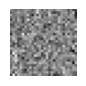

2024-06-28 11:04:38.609979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 191, Generator Loss: 0.7337982058525085, Discriminator Loss: 1.3740975856781006


2024-06-28 11:04:43.644955: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 192, Generator Loss: 0.7073012590408325, Discriminator Loss: 1.3868478536605835


2024-06-28 11:04:48.636527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 193, Generator Loss: 0.7354272603988647, Discriminator Loss: 1.3752615451812744


2024-06-28 11:04:53.660938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 194, Generator Loss: 0.727875828742981, Discriminator Loss: 1.3505101203918457


2024-06-28 11:04:58.612183: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 195, Generator Loss: 0.7407042384147644, Discriminator Loss: 1.3500592708587646


2024-06-28 11:05:03.572314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 196, Generator Loss: 0.7137677669525146, Discriminator Loss: 1.354330062866211


2024-06-28 11:05:08.652525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 197, Generator Loss: 0.7249082326889038, Discriminator Loss: 1.3727309703826904


2024-06-28 11:05:13.609170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 198, Generator Loss: 0.7064832448959351, Discriminator Loss: 1.3833184242248535


2024-06-28 11:05:18.666654: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 199, Generator Loss: 0.7093764543533325, Discriminator Loss: 1.3826196193695068
Epoch 200, Generator Loss: 0.6907224059104919, Discriminator Loss: 1.3634006977081299


2024-06-28 11:05:23.647611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


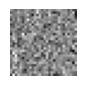

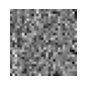

In [28]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


# Prepare the MNIST dataset
batch_size = 256
mnist_dataset = prepare_dataset(X, batch_size)

# Train the GAN
epochs = 200

# Define the directory where images will be saved
save_directory = 'training_images_' + str(epochs) + '_epochs_time_' + str(int(time.time()))

model_save_directory = 'saved_models'
loss_save_file = 'training_losses.npz'

# Create the directories if they don't exist
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)
    


train(mnist_dataset, epochs, save_directory, model_save_directory, loss_save_file)


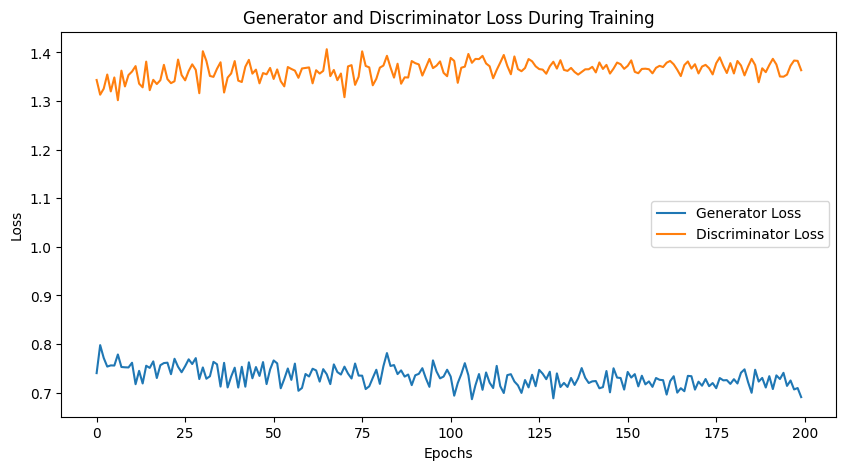

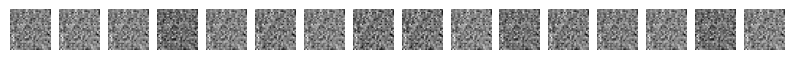

In [29]:
plot_losses(loss_save_file)

num_images_to_generate = 16

generator = keras.models.load_model('saved_models/generator_epoch_0200latent_space_size2.h5')


generate_images(generator, num_images_to_generate, latent_space_size)




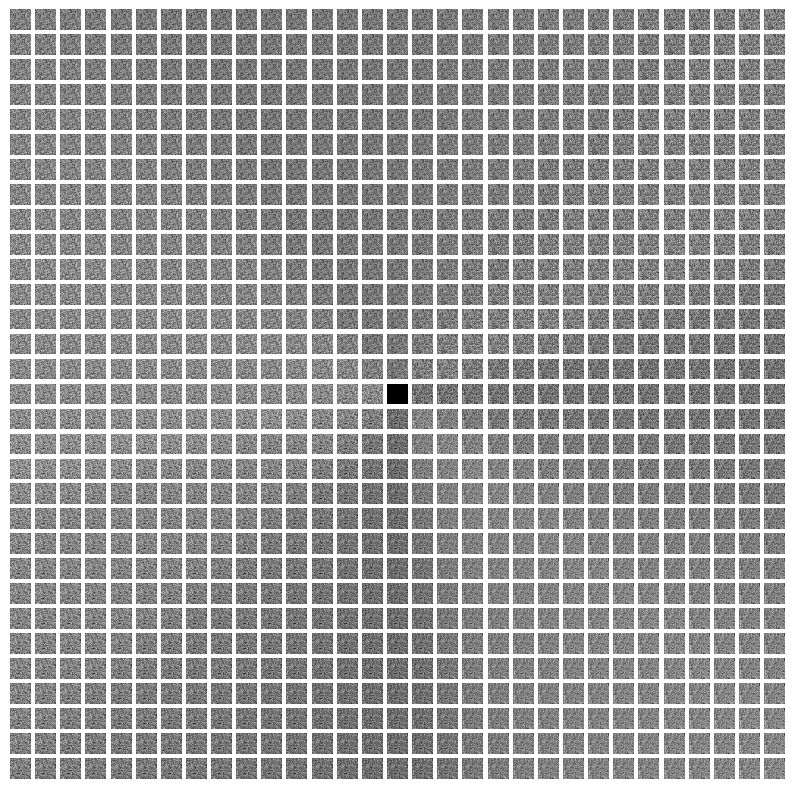

In [30]:
# Plotting the representation of the latent space
def plot_latent_space(generator_model, latent_space_size, num_points=1000):
    # Generate points in the latent space
    x = np.linspace(-1, 1, int(np.sqrt(num_points)))
    y = np.linspace(-1, 1, int(np.sqrt(num_points)))
    x, y = np.meshgrid(x, y)
    z = np.column_stack((x.flatten(), y.flatten()))

    # Generate images using the points in the latent space
    generated_images = generator_model(z, training=False)

    fig, axes = plt.subplots(int(np.sqrt(num_points)), int(np.sqrt(num_points)), figsize=(10, 10))

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        ax.axis('off')

    plt.show()

plot_latent_space(generator, latent_space_size)
